In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# train set
train = pd.read_csv("train.csv")
train['date_time'] = pd.to_datetime(train['date_time'])
train['month'] = train['date_time'].dt.month
train['weekday'] = train['date_time'].dt.weekday
train['hour'] = train['date_time'].dt.hour
X_train = train.drop(columns = ['date_time','traffic_volume'])
y_train = train.iloc[:,8]


# test set
test = pd.read_csv("test.csv")
test['date_time'] = pd.to_datetime(test['date_time'])
test['month'] = test['date_time'].dt.month
test['weekday'] = test['date_time'].dt.weekday
test['hour'] = test['date_time'].dt.hour
date_test = test['date_time']
X_test = test.drop(columns = ['date_time','traffic_volume'])
y_test = test.iloc[:,8]

# encode
le = preprocessing.LabelEncoder()
for i in ['holiday', 'weather_main', 'weather_description']:
    le = preprocessing.LabelEncoder()
    le = le.fit(X_train[i])
    X_train[i] = le.transform(X_train[i])
    X_test[i] = le.transform(X_test[i])
    
# standard
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [ ]:
mlp = MLPRegressor(random_state=0, hidden_layer_sizes=(100,50))
parameter_space = {
    "solver": ["lbfgs", "sgd", "adam"],
    "activation": ["logistic", "relu"], 
}
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1)
clf.fit(X_train, y_train)
print('Best parameters found:\n', clf.best_params_)
print("Best score: %0.2f" % clf.best_score_)

In [ ]:
# SGD
model_MLP = MLPRegressor(solver='sgd',activation='logistic', random_state=0, hidden_layer_sizes=(100,50), alpha=0.01)
model_MLP.fit(X_train, y_train)
pred_train = model_MLP.predict(X_train)
mse = mean_squared_error(pred_train,y_train)

print("SDG Solver's training MSE:", mse)

pred = model_MLP.predict(X_test)
plt.scatter(date_test, y_test, label="Actual")
plt.plot(date_test, pred, label="Predicted")
plt.xlabel("Time")
plt.ylabel("Volume")
plt.legend()
plt.show()

In [ ]:
iter_list = [500, 1000, 3000, 5000]

# LBFGS
mse_list1 = []
for n in iter_list:
    model_MLP = MLPRegressor(solver='lbfgs',activation='relu', random_state=0, hidden_layer_sizes=(100,50), max_iter=n)
    model_MLP.fit(X_train, y_train)
    pred_train = model_MLP.predict(X_train)
    mse = mean_squared_error(pred_train,y_train)
    mse_list1.append(mse)
    
# ADAM
mse_list2 = []
for n in iter_list:
    model_MLP = MLPRegressor(solver='adam',activation='relu', random_state=0, hidden_layer_sizes=(100,50), max_iter=n)
    model_MLP.fit(X_train, y_train)
    pred_train = model_MLP.predict(X_train)
    mse = mean_squared_error(pred_train,y_train)
    mse_list2.append(mse)
    
plt.plot(iter_list, mse_list1, label="LBFGS")
plt.plot(iter_list, mse_list2, label="ADAM")
plt.xlabel("max_iter")
plt.ylabel("training mse")
plt.legend()
plt.show()

In [ ]:
# optimize alpha for LBFGS
alpha_list = [1e-1, 1e-2, 1e-3, 1e-4]
mse_list = []
for a in alpha_list:
    mlp = MLPRegressor(random_state=0, hidden_layer_sizes=(100,50), solver="lbfgs", max_iter=5000, activation="relu", alpha=a)
    mlp.fit(X_train, y_train)
    pred_train = mlp.predict(X_train)
    mse = mean_squared_error(pred_train,y_train)
    mse_list.append(mse)

plt.plot(alpha_list, mse_list)
plt.xlabel("alpha")
plt.ylabel("training mse")
plt.show()

In [3]:
# traing model
start_time = time.time()
clf = MLPRegressor(hidden_layer_sizes=(100,50), solver="lbfgs", max_iter=5000, activation="relu", alpha=0.1)
clf.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

Training Time:  411.2843105792999
Training MSE:  129631.8413603092
Testing MSE:  1075083.3885449793


C:\Users\ariaq\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [47]:
# mse for training set
pred_train = clf.predict(X_train)
mse_train = mean_squared_error(pred_train,y_train)
score_train = clf.score(X_train, y_train)

# mse for testing set
pred_test = clf.predict(X_test)
mse_test = mean_squared_error(pred_test,y_test)
score_test = clf.score(X_test,y_test)

# print results
print("Training Time: ", training_time)
print("Training MSE: ", mse_train, "\nTraning score: ", score_train)
print("Testing MSE: ", mse_test, "\nTesting score: ", score_test)

Training Time:  411.2843105792999
Training MSE:  129631.8413603092 
Traning score:  0.9679444395715396
Testing MSE:  1075083.3885449793 
Testing score:  0.7262846788913866


<function matplotlib.pyplot.show(close=None, block=None)>

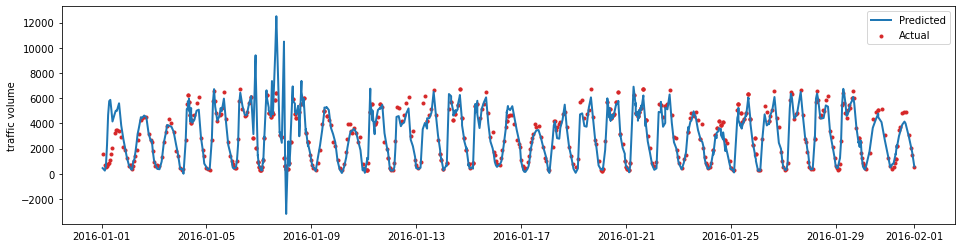

In [39]:
# display predictions
plt.figure(figsize=(16, 4))
plt.scatter(date_test, y_test, label="Actual", color="tab:red", marker=".")
plt.plot(date_test, pred_test, label="Predicted", color="tab:blue", linewidth=2)
plt.ylabel("traffic volume")
plt.legend()
plt.show